#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de 10 de setembro. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\HIST_PAINEL_COVIDBR_23set2020.xlsx'
df = pd.read_excel(filename)

In [3]:
df.shape

(1017545, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017545 entries, 0 to 1017544
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   regiao                  1017545 non-null  object        
 1   estado                  1017333 non-null  object        
 2   municipio               1007808 non-null  object        
 3   coduf                   1017545 non-null  int64         
 4   codmun                  1011609 non-null  float64       
 5   codRegiaoSaude          1007808 non-null  float64       
 6   nomeRegiaoSaude         1007808 non-null  object        
 7   data                    1017545 non-null  datetime64[ns]
 8   semanaEpi               1017545 non-null  int64         
 9   populacaoTCU2019        1013744 non-null  float64       
 10  casosAcumulado          1017545 non-null  int64         
 11  casosNovos              1017545 non-null  int64         
 12  obitosAcumulad

In [6]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
221131,Nordeste,RN,Pedro Velho,24,240980.0,24001.0,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,2020-09-10,37,14806.0,105,0,2,0,NaN,NaN,0.0
275385,Nordeste,PE,Barra de Guabiraba,26,260130.0,26003.0,CARUARU,2020-07-26,31,14385.0,139,2,10,0,NaN,NaN,0.0
323036,Nordeste,AL,São Miguel dos Campos,27,270860.0,27005.0,5ª REGIAO DE SAUDE,2020-09-12,37,61251.0,2082,2,32,0,NaN,NaN,0.0
756819,Sul,PR,Mercedes,41,411585.0,41020.0,20ª RS TOLEDO,2020-06-30,27,5536.0,4,1,0,0,NaN,NaN,0.0
444928,Sudeste,MG,Catuji,31,311545.0,31067.0,PADRE PARAISO,2020-06-02,23,6311.0,6,0,0,0,NaN,NaN,0.0
578783,Sudeste,ES,Pancas,32,320400.0,32001.0,CENTRAL,2020-09-06,37,23184.0,521,0,10,0,NaN,NaN,0.0
512129,Sudeste,MG,Ouro Verde de Minas,31,314620.0,31099.0,TEOFILO OTONI / MALACACHETA,2020-07-22,30,5934.0,10,8,2,0,NaN,NaN,0.0
736143,Sul,PR,Espigão Alto do Iguaçu,41,410754.0,41010.0,10ª RS CASCAVEL,2020-05-19,21,4117.0,0,0,0,0,NaN,NaN,0.0
56840,Norte,PA,Senador José Porfírio,15,150780.0,15012.0,XINGU,2020-05-09,19,11658.0,3,0,0,0,NaN,NaN,0.0
123630,Nordeste,MA,Senador La Rocque,21,211176.0,21008.0,IMPERATRIZ,2020-05-10,20,14293.0,10,3,1,1,NaN,NaN,0.0


In [7]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    34492
RJ    17911
CE     8861
PE     8085
MG     6897
PA     6489
BA     6408
RS     4515
GO     4265
PR     4244
AM     3984
MA     3683
ES     3452
MT     3287
DF     3148
PB     2741
SC     2686
RN     2356
PI     2061
AL     2034
SE     1999
RO     1320
MS     1204
TO      890
AP      697
AC      652
RR      616
Name: obitosAcumulado, dtype: int64

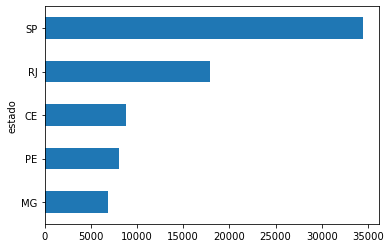

In [8]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(5).plot(kind='barh')

In [9]:
df['data'] = df['data'].dt.strftime('%d/%m')

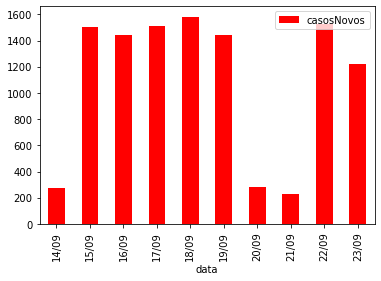

In [10]:
sp = df.query('municipio == "São Paulo"')
sp.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

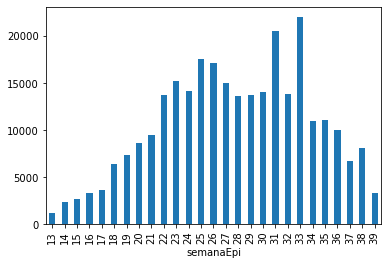

In [11]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')

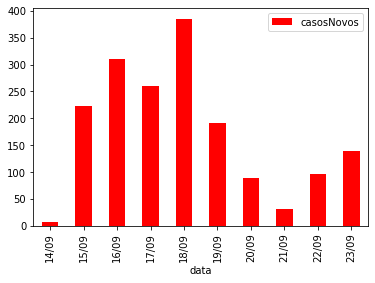

In [12]:
sjc = df.query('municipio == "São José dos Campos"')
sjc.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

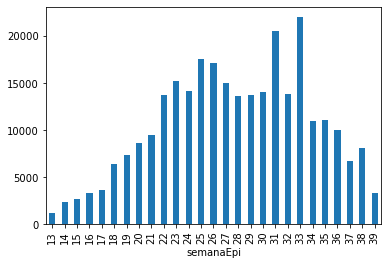

In [13]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')